In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 98% 698M/715M [00:07<00:00, 217MB/s]
100% 715M/715M [00:07<00:00, 96.3MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset has been extracted")

The dataset has been extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.5 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')
print(f"{type(filenames) = }")
print(f"{len(filenames) = }")

type(filenames) = <class 'list'>
len(filenames) = 50000


In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['620.png', '14288.png', '18828.png', '48988.png', '29281.png']
['35799.png', '28079.png', '35418.png', '3526.png', '40515.png']


Labels Processing

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')
print(f"{labels_df.shape = }")
labels_df.head()

labels_df.shape = (50000, 2)


,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


Above gives us an idea that the labels of the data are in chronological order but the training data is not

In [ ]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

Above gives us an idea that the data is uniformly distributed within all the classes which is a good thing when it comes to model training

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird': 2, 'cat':3, 'deer': 4, 'dog':5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
labels = [labels_dictionary[i] for i in labels_df['label']]

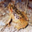

In [ ]:
#displaying a sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [ ]:
id_list = list(labels_df['id'])
id_list[0:5]

[1, 2, 3, 4, 5]

Image Processing

In [ ]:
#Convert images to numpy arrays
train_data_folder = '/content/train/'
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
#convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(f"{X.shape = }")
print(f"{Y.shape = }")


X.shape = (50000, 32, 32, 3)
Y.shape = (50000,)


**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")

print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000,)
X_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000,)


In [ ]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building the Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes  = 10

##setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

In [ ]:
#compile the neural network
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 8s 5ms/step - loss: 1.9133 - acc: 0.3018 - val_loss: 1.7699 - val_acc: 0.3650
Epoch 2/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.7500 - acc: 0.3700 - val_loss: 1.7277 - val_acc: 0.3747
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6895 - acc: 0.3948 - val_loss: 1.6605 - val_acc: 0.3972
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6526 - acc: 0.4076 - val_loss: 1.6626 - val_acc: 0.4017
Epoch 5/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.6180 - acc: 0.4199 - val_loss: 1.7008 - val_acc: 0.3935
Epoch 6/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.5958 - acc: 0.4274 - val_loss: 1.6231 - val_acc: 0.4135
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.5665 - acc: 0.4392 - val_loss: 1.6110 - val_acc: 0.4250
Epoch 8/10
1125/1125 [==============================] - 4s 3ms